<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [3]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 178.5 MB/s eta 0:00:00


In [4]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 134.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 150.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 159.1 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [5]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-13 18:07:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.9MB/s    in 2.5s    

2025-07-13 18:07:37 (59.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [7]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [9]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_319/3597551867.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()


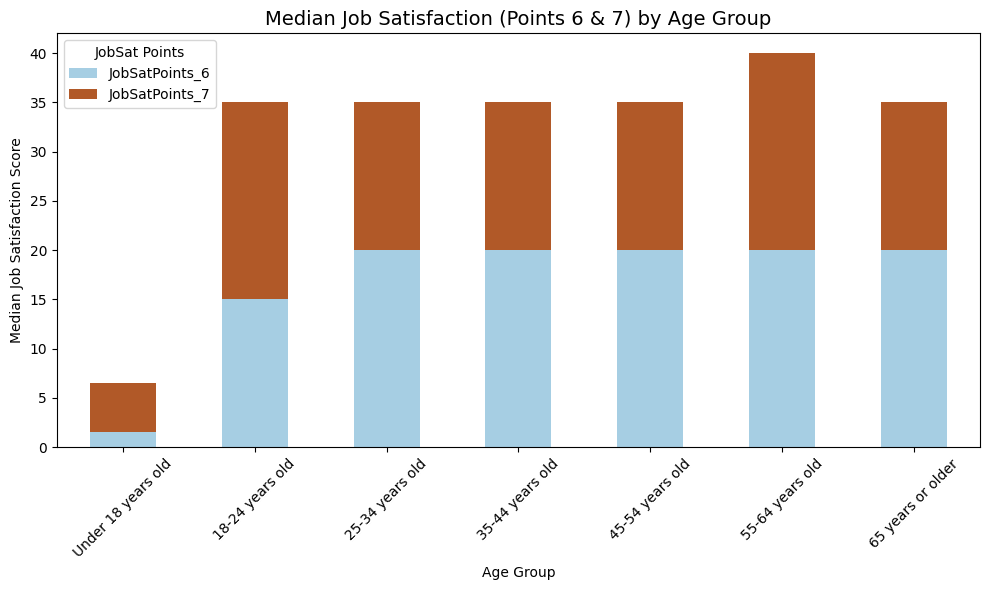

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (since it's in the same directory)
df = pd.read_csv("survey-data.csv")

# Define the correct order of age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Filter out rows with valid age values
df = df[df['Age'].isin(age_order)].copy()

# Convert 'Age' to a categorical type with proper order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Convert satisfaction scores to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Group by Age and compute medians
grouped = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')

# Customize the chart
plt.title('Median Job Satisfaction (Points 6 & 7) by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(title='JobSat Points')
plt.tight_layout()

# Show plot
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


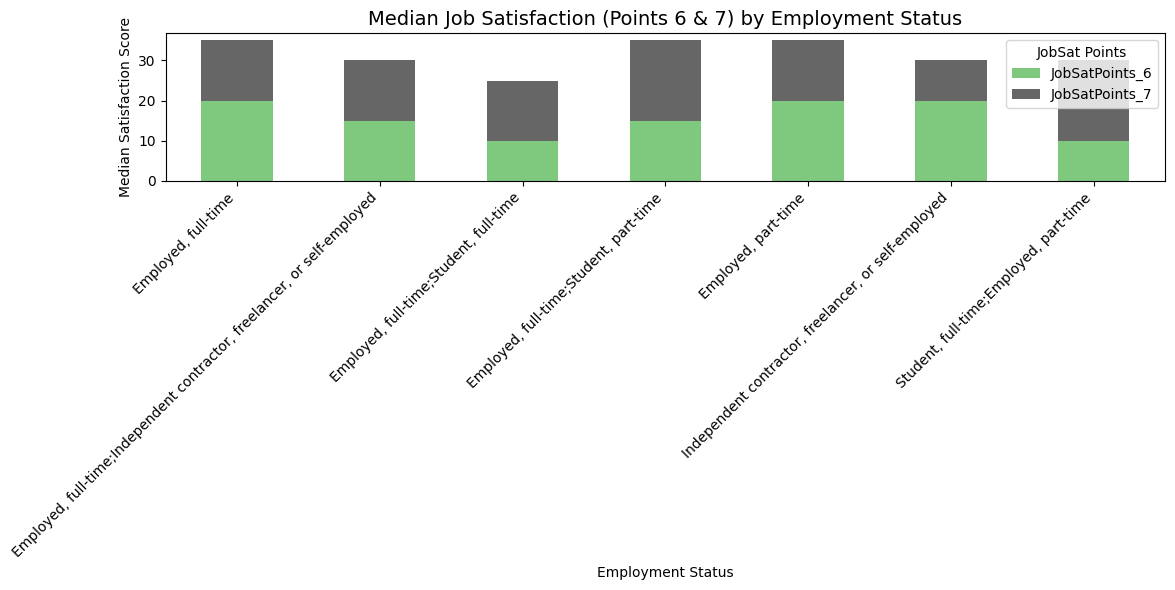

In [12]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (same folder as script)
df = pd.read_csv("survey-data.csv")

# Convert relevant columns to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Drop rows with missing Employment or JobSat values
df_filtered = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Employment type and calculate median satisfaction
grouped = df_filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Keep top 7 most common employment types for better visualization
top_employment = df_filtered['Employment'].value_counts().nlargest(7).index
grouped = grouped.loc[grouped.index.isin(top_employment)]

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')

# Customize the plot
plt.title('Median Job Satisfaction (Points 6 & 7) by Employment Status', fontsize=14)
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='JobSat Points')
plt.tight_layout()

# Show plot
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_319/3472073273.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_filtered.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()


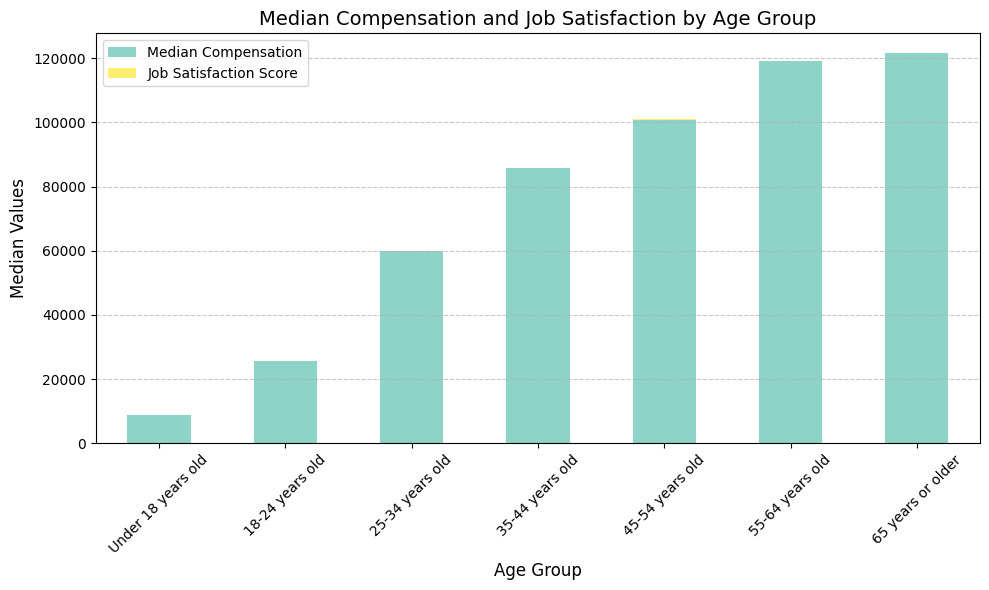

In [15]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Define proper age order for display
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Filter out rows with missing values in required columns
df_filtered = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Ensure 'Age' is a categorical column with the specified order
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Group by Age and compute median of both metrics
grouped = df_filtered.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title("Median Compensation and Job Satisfaction by Age Group", fontsize=14)
plt.ylabel("Median Values", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.xticks(rotation=45)
plt.legend(["Median Compensation", "Job Satisfaction Score"], loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_319/3610133777.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_exploded.groupby(['Age', 'Database']).size().unstack(fill_value=0)


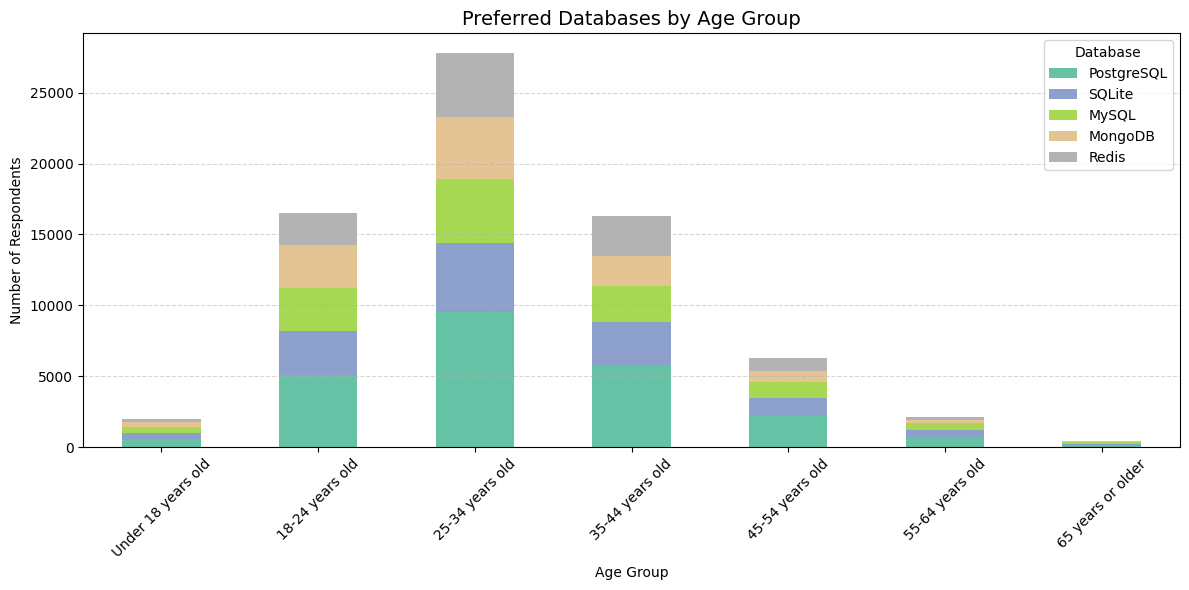

In [16]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Define the correct age group order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Filter relevant columns and drop missing values
df_filtered = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Convert Age to ordered categorical for consistent plotting
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Split multiple database entries (assumes entries are separated by semicolons)
df_exploded = df_filtered.assign(Database=df_filtered['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Group by Age and Database, count occurrences
grouped = df_exploded.groupby(['Age', 'Database']).size().unstack(fill_value=0)

# Filter top 5 databases overall
top_databases = df_exploded['Database'].value_counts().head(5).index
grouped = grouped[top_databases]

# Plot as a stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Preferred Databases by Age Group", fontsize=14)
plt.ylabel("Number of Respondents")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Database")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


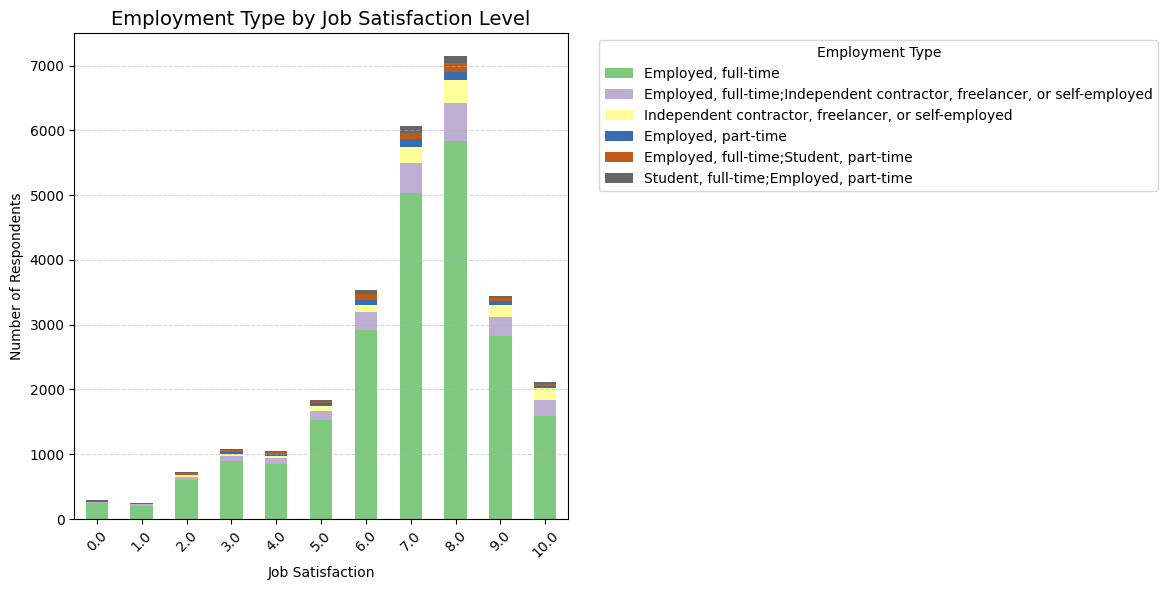

In [17]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Filter necessary columns and drop missing values
df_filtered = df[['Employment', 'JobSat']].dropna()

# Simplify JobSat responses (optional: keep original if detailed analysis is needed)
# You can map or bin satisfaction levels if needed, but here we keep them as-is

# Group and count combinations
grouped = df_filtered.groupby(['JobSat', 'Employment']).size().unstack(fill_value=0)

# Optional: Keep only top 6 Employment types (to reduce clutter)
top_employment = df_filtered['Employment'].value_counts().head(6).index
grouped = grouped[top_employment]

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')

# Labels and formatting
plt.title("Employment Type by Job Satisfaction Level", fontsize=14)
plt.xlabel("Job Satisfaction")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_319/487558343.py:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_top.pivot_table(index='Age', columns='LanguageAdmired', aggfunc='size', fill_value=0)


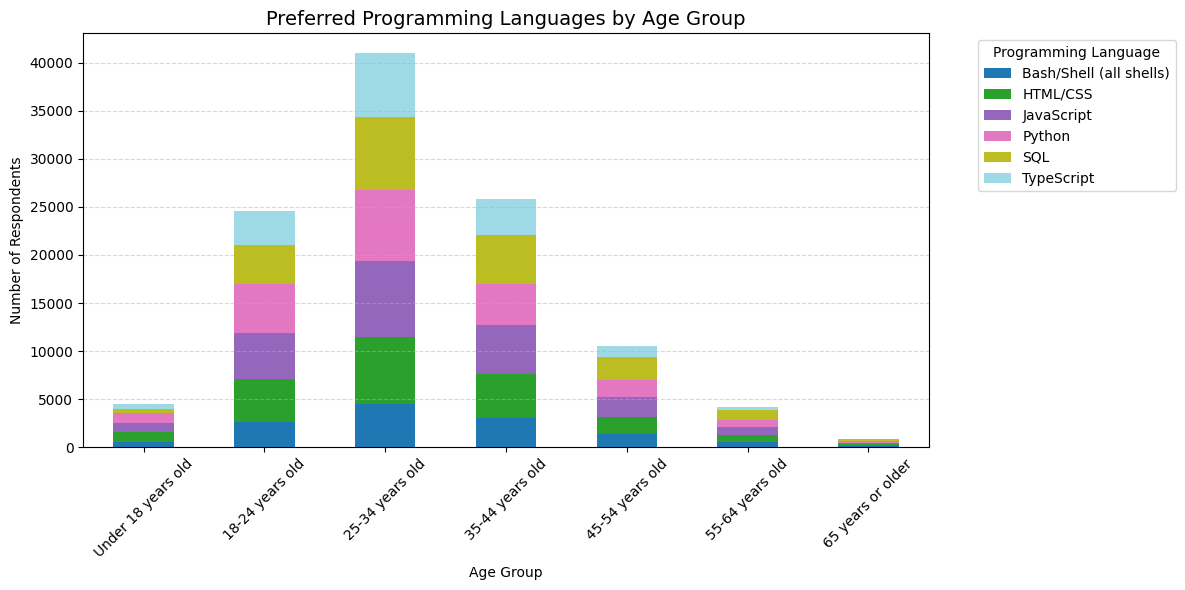

In [18]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Ensure required columns are present
df = df[['Age', 'LanguageAdmired']].dropna()

# Split multi-response entries in LanguageAdmired
df_expanded = df.assign(LanguageAdmired=df['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Clean whitespace
df_expanded['LanguageAdmired'] = df_expanded['LanguageAdmired'].str.strip()

# Standardize age group order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

df_expanded['Age'] = pd.Categorical(df_expanded['Age'], categories=age_order, ordered=True)
df_expanded = df_expanded.dropna(subset=['Age'])

# Optional: Select top 6 most admired languages
top_languages = df_expanded['LanguageAdmired'].value_counts().head(6).index
df_top = df_expanded[df_expanded['LanguageAdmired'].isin(top_languages)]

# Create pivot table: Age vs LanguageAdmired
pivot_table = df_top.pivot_table(index='Age', columns='LanguageAdmired', aggfunc='size', fill_value=0)

# Plot the stacked chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Formatting
plt.title("Preferred Programming Languages by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Programming Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_319/3400652106.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


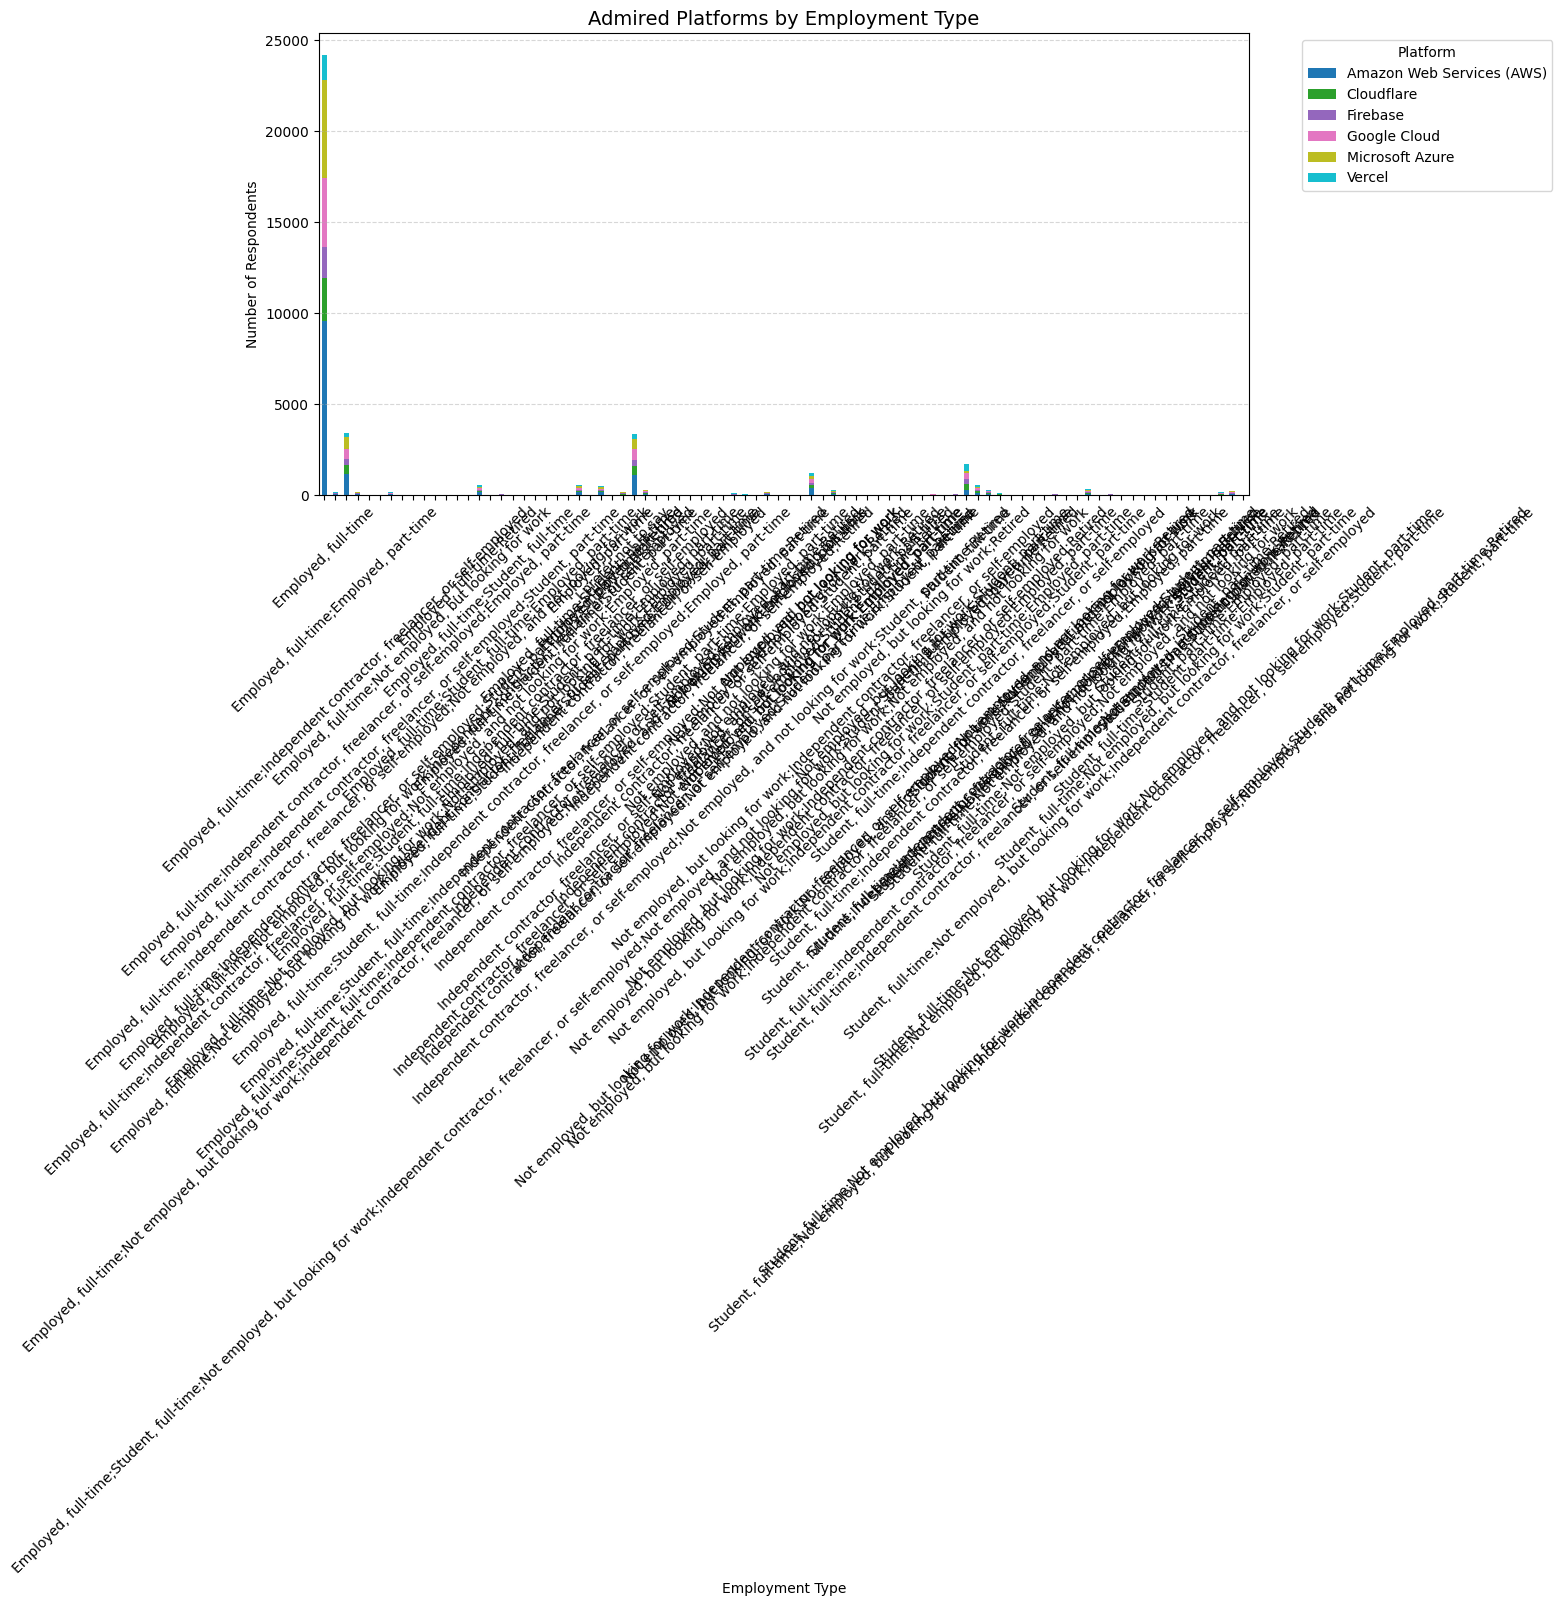

In [19]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep only relevant columns and drop missing values
df = df[['Employment', 'PlatformAdmired']].dropna()

# Split multiple admired platforms (separated by ;)
df_expanded = df.assign(PlatformAdmired=df['PlatformAdmired'].str.split(';')).explode('PlatformAdmired')

# Clean whitespace
df_expanded['PlatformAdmired'] = df_expanded['PlatformAdmired'].str.strip()
df_expanded['Employment'] = df_expanded['Employment'].str.strip()

# Optional: Limit to top 6 admired platforms
top_platforms = df_expanded['PlatformAdmired'].value_counts().head(6).index
df_top = df_expanded[df_expanded['PlatformAdmired'].isin(top_platforms)]

# Create pivot table: Employment vs PlatformAdmired
pivot_table = df_top.pivot_table(index='Employment', columns='PlatformAdmired', aggfunc='size', fill_value=0)

# Plot the stacked chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

# Formatting
plt.title("Admired Platforms by Employment Type", fontsize=14)
plt.xlabel("Employment Type")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
